# Modelos Discriminativos vs Generativos

Ambos mensuram a probabilidade de um exemplo pertencer à uma classe

**Modelos Discriminativos**: O objetivo é modelar a fronteira de decisão entre classes<br>
**Modelos Generativos**: O objetivo é modelar a distribuição de cada classe

# Métodos Discriminativos

## [Análise Discriminante Linear](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) (LDA)

* O número de elementos em cada classe deve ser balanceado
* Muito sensivel a outliers
* As matrizes de covariancia de cada grupo devem ser identicas (ou pelo menos similares)
* Assume que todas variaveis são contínuas (não categóricas)
* Assume que todas as variáveis respeitam uma distribuição normal
* Não requer normalização*
* Também pode ser usado como um técnica de redução de dimensionalidade (similar ao PCA)
* Requer que as classes sejam linearmente separáveis

## [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (LR)

* O número de elementos em cada classe pode ser desbalanceado (não muito)
* Estima a probabilidade de pertencer à classe
* Não muito sensível á outliers (comparado ao LDA)
* Não há requisitos sobre a matriz de covariância entre as classes
* Pode ser usado com variáveis continuas ou categóricas (one-hot encode)
* Não assume que todas as variáveis respeitem uma distribuição normal
* Não requer normalização*
* Requer que as classes sejam linearmente separáveis

# Exemplo

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [10]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2,  n_clusters_per_class=1, random_state=3)

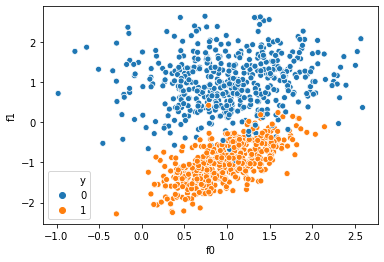

In [11]:
df = pd.DataFrame({'f0': X[:,0], 'f1': X[:,1], 'y': y})
sns.scatterplot(x='f0', y='f1', data=df, hue='y')

In [12]:
lr = LogisticRegression(random_state=1)
lda = LinearDiscriminantAnalysis()

lr.fit(X, y)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

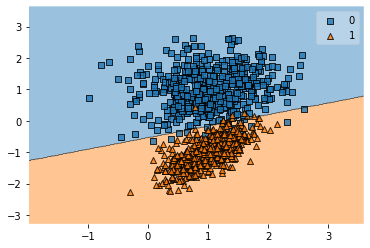

In [13]:
plot_decision_regions(X, y, clf=lr)

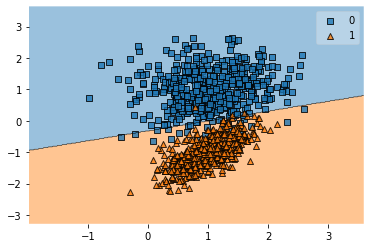

In [14]:
plot_decision_regions(X, y, clf=lda)

## Da fórmula para a implementação (LR)

$f(x) = w_0 + w_1x_1 + w_2x_2 + \dots$

$\log(\frac{p(x)}{1-p(x)}) = f(x) = w_0 + w_1x_1 + w_2x_2+\dots$

$p(x) = \frac{1}{1+e^{-f(x)}} = \frac{e^{f(x)}}{1 + e^{f(x)}}$

In [20]:
import math
import numpy as np

def f(w, x): return np.dot(w, x)
def p(x): return 1/(1+math.exp(-x))

w0,(w1, w2) = lr.intercept_, lr.coef_[0]
x0,(x1, x2) = 1, X[0,:]

w = np.array([w0, w1, w2])
x = np.array([x0, x1, x2])

p(f(w, x)), lr.predict_proba([X[0,:]])[:,1]

(0.0001244179252859449, array([0.00012442]))

## Referencias

[Decision Boundary Visualization](https://towardsdatascience.com/decision-boundary-visualization-a-z-6a63ae9cca7d)<br>
[Logistic Regression 101](https://machinelearning-blog.com/2018/04/23/logistic-regression-101)<br>
[Linear Discriminant Analysis for Dimensionality Reduction](https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python)<br>
[Logistic regression vs. LDA as two-class classifiers](https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers)<br>